In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, SystemMessage, HumanMessage, AIMessage
# for add all messages to state
from langgraph.graph.message import add_messages
# for memory saver (local ram)
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini", api_key="")
# define state
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
# define functions
def chat_node(state: ChatState):
    all_messages = state['messages']
    llm_response = llm.invoke(all_messages)
    return {'messages': [llm_response]}

In [4]:
# define memory
check_pointer = MemorySaver()

# define state
graph = StateGraph(ChatState)
graph.add_node("chat_node", chat_node)
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

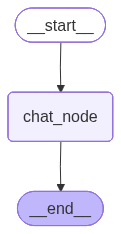

In [5]:
chatbot = graph.compile(checkpointer=check_pointer)
chatbot

In [6]:
# check llm with a state
# initial_state = {'messages': [SystemMessage(content="You are a chatbot."), 
#                               HumanMessage(content="Hello my name is pranto.")]}
# chatbot.invoke(initial_state)

In [ ]:
thread_id = "1"

config = {'configurable': {"thread_id": thread_id}}

# make the loop for the chatbot
while True:
    user_input = input("User: ")
    print("User: " + user_input)
    if user_input.strip().lower() in ["exit", "quit", "bye", "stop", "end", "q"]:
        break
    initial_state = {'messages': [SystemMessage(content="You are a helpful chatbot."),
                                  HumanMessage(content=user_input)]}
    response = chatbot.invoke(initial_state, config=config)
    print("Chatbot: " + response['messages'][-1].content)

User: hi my name is pranto
Chatbot: Hi Pranto! How can I assist you today?
User: q
